In [1]:
!pip install findspark

In [1]:
import findspark
findspark.init(r'/Users/reid/Documents/Spark/spark-3.2.4-bin-hadoop3.2')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,DoubleType)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/13 00:42:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
file='global-data-on-sustainable-energy.csv'

In [3]:
df = spark.read.csv('global-data-on-sustainable-energy.csv')

In [4]:
summary = df.describe()

In [5]:
df_sum_shows = summary.toPandas()
display(df_sum_shows)

,summary,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,...,_c11,_c12,_c13,_c14,_c15,_c16,_c17,_c18,_c19,_c20
0,count,3650,3650,3640,3481,2719,1561,3456,3629,3524,...,3650,3443,3222,1513,3333,3368,3649,3649,3649,3649
1,mean,None,2010.0383666758016,78.93370216207742,63.255287356321816,113.13749816041195,9.4224E7,32.63816497829229,70.3650027563395,13.450190178824874,...,25743.981745042187,5.307345058890176,159866.46268574576,11.98670682809521,3.441610056684865,13283.774347967446,141.03048264182897,436.35,18.24638776044415,14.82269454217112
2,stddev,None,6.054228365650764,30.275541433748966,39.0436575747337,244.16725566287886,2.981544065856051E8,29.89490136284931,348.0518661301112,73.00662309724122,...,34773.22136574411,3.5320200831542703,773661.0643937221,14.994644244604254,5.686720157202891,19709.866715804725,169.2210812480414,262.2077896255833,24.15923168795461,66.34814783833218
3,min,Afghanistan,2000,1.2522693,0,0,0,0,0,0,...,0,0.11,10,0,-0.003836559,1000.936715,"1,265","1,03,000",-0.023559,-1.023194
4,max,Zimbabwe,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-...,Financial flows to developing countries (US $),Renewable energy share in the total final ener...,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,Primary energy consumption per capita (kWh/per...,Energy intensity level of primary energy (MJ/$...,Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


In [7]:
df = spark.read.csv('global-data-on-sustainable-energy.csv', inferSchema=True, header=True)

In [8]:
df.show()

+-----------+----+---------------------------------------+---------------------------------+----------------------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------+--------------------------------------------------+-----------------------------------------------------------+---------------------------------+----------------------------------------+-----------+--------------+----------------+--------------+--------+---------+
|     Entity|Year|Access to electricity (% of population)|Access to clean fuels for cooking|Renewable-electricity-generating-capacity-per-capita|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity fr

In [9]:
df_shows = df.toPandas()
display(df_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,"3,90,757",-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,"3,90,757",-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,"3,90,757",-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,"3,90,757",-19.015438,29.154857


In [15]:
df_shows = df.toPandas()
display(df_shows.info)

<bound method DataFrame.info of            Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                     

In [16]:
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Access to electricity (% of population): double (nullable = true)
 |-- Access to clean fuels for cooking: double (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: double (nullable = true)
 |-- Financial flows to developing countries (US $): long (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): double (nullable = true)
 |-- Electricity from fossil fuels (TWh): double (nullable = true)
 |-- Electricity from nuclear (TWh): double (nullable = true)
 |-- Electricity from renewables (TWh): double (nullable = true)
 |-- Low-carbon electricity (% electricity): double (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): double (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): double (nullable = true)
 |-- Value_co2_emissions_kt_by_country: double (nullable = true)
 |-- Renewables (% equival

In [20]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [27]:
spark = SparkSession.builder.appName("DescribeDemo").getOrCreate()

In [28]:
describe_df = df.describe()
describe_pandas_df = describe_df.toPandas()
print(describe_pandas_df)

  summary       Entity                Year  \
0   count         3649                3649   
1    mean         None  2010.0383666758016   
2  stddev         None   6.054228365650764   
3     min  Afghanistan                2000   
4     max     Zimbabwe                2020   

  Access to electricity (% of population) Access to clean fuels for cooking  \
0                                    3639                              3480   
1                       78.93370216207742                63.255287356321816   
2                      30.275541433748966                  39.0436575747337   
3                               1.2522693                               0.0   
4                                   100.0                             100.0   

  Renewable-electricity-generating-capacity-per-capita  \
0                                               2718     
1                                 113.13749816041195     
2                                 244.16725566287886     
3               

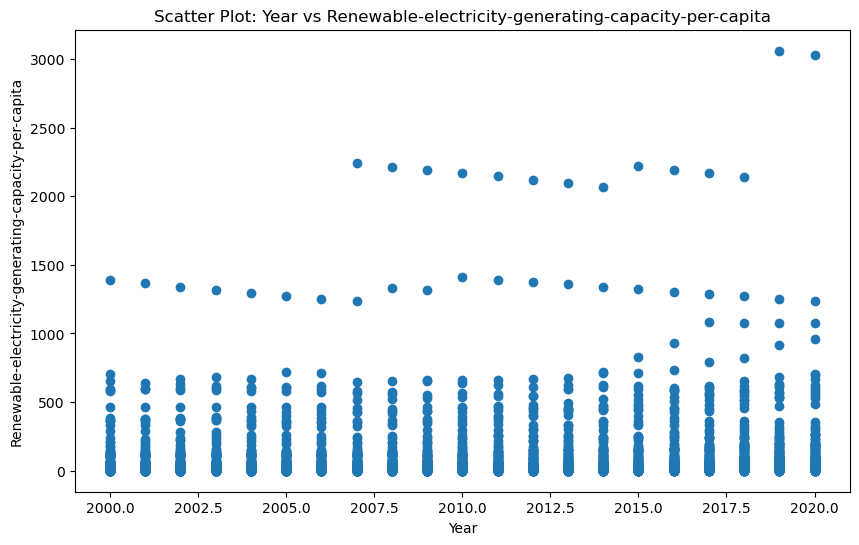

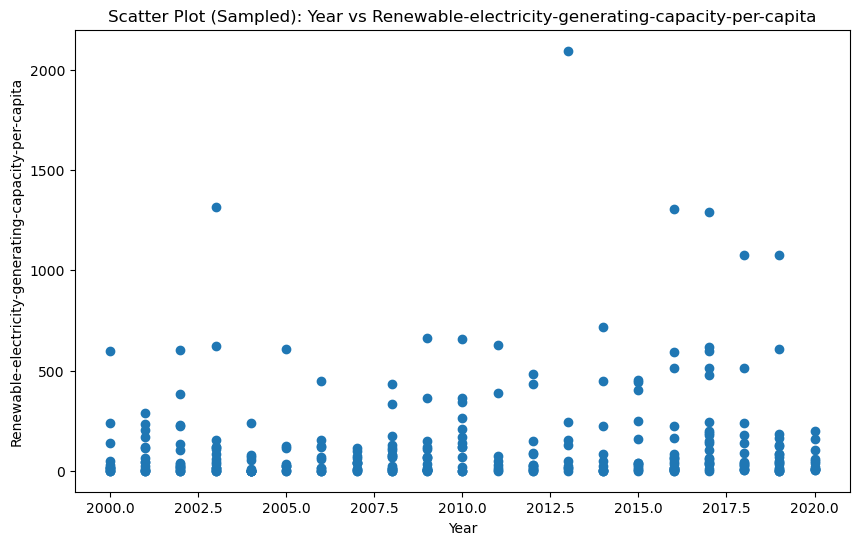

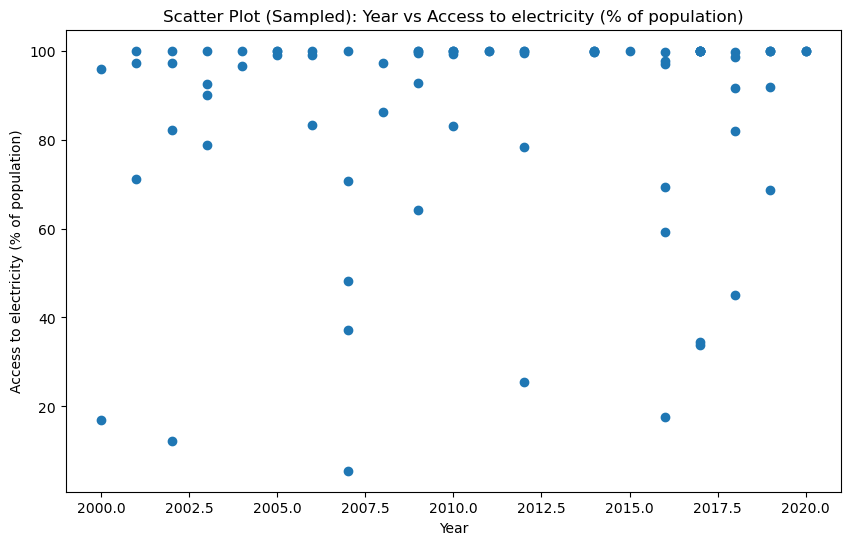

In [10]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
spark = SparkSession.builder.appName("ScatterPlotDemo").getOrCreate()
plt.figure(figsize=(10, 6))
plt.scatter(df.select("Year").collect(), df.select("Renewable-electricity-generating-capacity-per-capita").collect())
plt.xlabel("Year")
plt.ylabel("Renewable-electricity-generating-capacity-per-capita")
plt.title("Scatter Plot: Year vs Renewable-electricity-generating-capacity-per-capita")
plt.show()

sampled_df = df.sample(False, 0.1, seed=42)  # Sample 10% of the data
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df.select("Year").collect(), sampled_df.select("Renewable-electricity-generating-capacity-per-capita").collect())
plt.xlabel("Year")
plt.ylabel("Renewable-electricity-generating-capacity-per-capita")
plt.title("Scatter Plot (Sampled): Year vs Renewable-electricity-generating-capacity-per-capita")
plt.show()

# Sampling and plotting scatterplots：Year vs Access to electricity (% of population)
sampled_df2 = df.sample(False, 0.02, seed=42)  # Sample 2% of the data
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df2.select("Year").collect(), sampled_df2.select("Access to electricity (% of population)").collect())
plt.xlabel("Year")
plt.ylabel("Access to electricity (% of population)")
plt.title("Scatter Plot (Sampled): Year vs Access to electricity (% of population)")
plt.show()


# 2.4 Missing values

In [67]:
df0 = spark.read.csv('global-data-on-sustainable-energy.csv', inferSchema=True, header=True)

In [74]:
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("DropNaNsDemo").getOrCreate()

columns_to_drop_na = ['gdp_per_capita', 'Access to electricity (% of population)',
                      'Access to clean fuels for cooking', 'Electricity from renewables (TWh)',
                      'Low-carbon electricity (% electricity)', 'Renewables (% equivalent primary energy)',
                      'gdp_growth', 'Financial flows to developing countries (US $)',
                      'Renewable energy share in the total final energy consumption (%)',
                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                      'Value_co2_emissions_kt_by_country', 'Electricity from nuclear (TWh)']

# Deletes rows that contain missing values
df0 = df0.dropna(subset=columns_to_drop_na)

# Displays the DataFrame with the missing value removed in pandas fashion

df_shows = df0.toPandas()
display(df_shows)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Algeria,2001,98.96687,97.30,8.79,810000,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18,"23,81,741",28.033886,1.659626
1,Algeria,2002,98.95306,97.80,8.68,310000,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18,"23,81,741",28.033886,1.659626
2,Algeria,2003,98.93401,98.00,8.57,90000,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18,"23,81,741",28.033886,1.659626
3,Algeria,2004,98.91208,98.20,8.46,140000,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18,"23,81,741",28.033886,1.659626
4,Algeria,2005,98.88961,98.50,8.34,160000,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18,"23,81,741",28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Uzbekistan,2015,100.00000,85.35,60.83,270000,1.71,47.55,0.0,7.00,...,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79,"4,47,400",41.377491,64.585262
339,Uzbekistan,2016,100.00000,85.20,59.88,690000,1.61,48.75,0.0,7.25,...,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79,"4,47,400",41.377491,64.585262
340,Uzbekistan,2017,100.00000,84.90,58.24,60130000,1.75,49.71,0.0,8.35,...,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79,"4,47,400",41.377491,64.585262
341,Uzbekistan,2018,100.00000,84.30,59.09,84130000,1.49,53.58,0.0,5.85,...,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79,"4,47,400",41.377491,64.585262


In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, when,col

spark = SparkSession.builder.appName("MeanAndFillnaDemo").getOrCreate()

describe_column = 'Renewable-electricity-generating-capacity-per-capita'
# Calculate the mean value
mean_values = df.select(mean(describe_column)).collect()[0][0]
# Fill in missing values using the mean
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Access to electricity (% of population)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Access to clean fuels for cooking'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Access to electricity (% of population)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Financial flows to developing countries (US $)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Renewable energy share in the total final energy consumption (%)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Electricity from fossil fuels (TWh)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Electricity from nuclear (TWh)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Electricity from renewables (TWh)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Low-carbon electricity (% electricity)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Primary energy consumption per capita (kWh/person)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Value_co2_emissions_kt_by_country'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Renewables (% equivalent primary energy)'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'gdp_growth'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'gdp_per_capita'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Latitude'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

describe_column = 'Longitude'
mean_values = df.select(mean(describe_column)).collect()[0][0]
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

df_cleaned_shows = df.toPandas()
display(df_cleaned_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,"3,90,757",-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,"3,90,757",-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,"3,90,757",-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,"3,90,757",-19.015438,29.154857


In [44]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, when,col

spark = SparkSession.builder.appName("MeanAndFillnaDemo").getOrCreate()

describe_column = 'Renewable-electricity-generating-capacity-per-capita'
# Calculate the mean value
mean_values = df.select(mean(describe_column)).collect()[0][0]
# Fill in missing values using the mean
df_cleaned = df.withColumn(describe_column, when(col(describe_column).isNull(), mean_values).otherwise(col(describe_column)))

print(mean_values)

df_cleaned_shows = df.toPandas()
display(df_cleaned_shows)

113.13749816041195


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,"3,90,757",-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,"3,90,757",-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,"3,90,757",-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,"3,90,757",-19.015438,29.154857


# 3. DATA PREPARATION
3.2 Clean the Data - Deal Missing values

In [63]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DropNaNsDemo").getOrCreate()

columns_to_drop_na = ['gdp_per_capita', 'Access to electricity (% of population)',
                      'Access to clean fuels for cooking', 'Electricity from renewables (TWh)',
                      'Low-carbon electricity (% electricity)', 'Renewables (% equivalent primary energy)',
                      'gdp_growth', 'Financial flows to developing countries (US $)',
                      'Renewable energy share in the total final energy consumption (%)',
                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                      'Value_co2_emissions_kt_by_country', 'Electricity from nuclear (TWh)']

# Deletes rows that contain missing values
df = df.dropna(subset=columns_to_drop_na)

# Displays the DataFrame with the missing value removed in pandas fashion

df_shows = df.toPandas()
display(df_shows)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,94224000,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,11.986707,0.755869,1464.588957,38,"3,90,757",-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,11.986707,4.709492,1235.189032,38,"3,90,757",-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,11.986707,4.824211,1254.642265,38,"3,90,757",-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,11.986707,-6.144236,1316.740657,38,"3,90,757",-19.015438,29.154857


In [52]:
from pyspark.sql.functions import mean, col

df_mean_value = df.agg(mean(col("Renewables (% equivalent primary energy)"))).collect()[0][0]
df = df.fillna({"Renewables (% equivalent primary energy)": df_mean_value})

df_mean_value = df.agg(mean(col("gdp_growth"))).collect()[0][0]
df = df.fillna({"gdp_growth": df_mean_value})

df_mean_value = df.agg(mean(col("Renewable-electricity-generating-capacity-per-capita"))).collect()[0][0]
df = df.fillna({"Renewable-electricity-generating-capacity-per-capita": df_mean_value})

df_mean_value = df.agg(mean(col("Access to electricity (% of population)"))).collect()[0][0]
df = df.fillna({"Access to electricity (% of population)": df_mean_value})

df_mean_value = df.agg(mean(col("Access to clean fuels for cooking"))).collect()[0][0]
df = df.fillna({"Access to clean fuels for cooking": df_mean_value})

df_mean_value = df.agg(mean(col("Financial flows to developing countries (US $)"))).collect()[0][0]
df = df.fillna({"Financial flows to developing countries (US $)": df_mean_value})

df_mean_value = df.agg(mean(col("Renewable energy share in the total final energy consumption (%)"))).collect()[0][0]
df = df.fillna({"Renewable energy share in the total final energy consumption (%)": df_mean_value})

df_mean_value = df.agg(mean(col("Electricity from fossil fuels (TWh)"))).collect()[0][0]
df = df.fillna({"Electricity from fossil fuels (TWh)": df_mean_value})

df_mean_value = df.agg(mean(col("Electricity from nuclear (TWh)"))).collect()[0][0]
df = df.fillna({"Electricity from nuclear (TWh)": df_mean_value})

df_mean_value = df.agg(mean(col("Electricity from renewables (TWh)"))).collect()[0][0]
df = df.fillna({"Electricity from renewables (TWh)": df_mean_value})

df_mean_value = df.agg(mean(col("Low-carbon electricity (% electricity)"))).collect()[0][0]
df = df.fillna({"Low-carbon electricity (% electricity)": df_mean_value})

df_mean_value = df.agg(mean(col("Primary energy consumption per capita (kWh/person)"))).collect()[0][0]
df = df.fillna({"Primary energy consumption per capita (kWh/person)": df_mean_value})

df_mean_value = df.agg(mean(col("Energy intensity level of primary energy (MJ/$2017 PPP GDP)"))).collect()[0][0]
df = df.fillna({"Energy intensity level of primary energy (MJ/$2017 PPP GDP)": df_mean_value})

df_mean_value = df.agg(mean(col("Value_co2_emissions_kt_by_country"))).collect()[0][0]
df = df.fillna({"Value_co2_emissions_kt_by_country": df_mean_value})

df_mean_value = df.agg(mean(col("Renewables (% equivalent primary energy)"))).collect()[0][0]
df = df.fillna({"Renewables (% equivalent primary energy)": df_mean_value})

df_mean_value = df.agg(mean(col("gdp_per_capita"))).collect()[0][0]
df = df.fillna({"gdp_per_capita": df_mean_value})

df_mean_value = df.agg(mean(col("Latitude"))).collect()[0][0]
df = df.fillna({"Latitude": df_mean_value})

df_mean_value = df.agg(mean(col("Longitude"))).collect()[0][0]
df = df.fillna({"Longitude": df_mean_value})

df_shows = df.toPandas()
display(df_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,94224000,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,11.986707,0.755869,1464.588957,38,"3,90,757",-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,11.986707,4.709492,1235.189032,38,"3,90,757",-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,11.986707,4.824211,1254.642265,38,"3,90,757",-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,11.986707,-6.144236,1316.740657,38,"3,90,757",-19.015438,29.154857


# 7. 	DATA-MINING

In [75]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

spark = SparkSession.builder.appName("LinearRegressionDemo").getOrCreate()

df0.printSchema()

# 准备特征向量和目标列
feature_columns = ['gdp_per_capita', 'Access to electricity (% of population)',
                   'Access to clean fuels for cooking', 'Electricity from renewables (TWh)',
                   'Low-carbon electricity (% electricity)', 'Renewables (% equivalent primary energy)'
                   ]
target_column = 'Renewable-electricity-generating-capacity-per-capita'

# 合并特征列为一个向量列
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df0_features = vector_assembler.transform(df0)

# 选择特征向量列和目标列
df0_features = df0_features.select("features", target_column)

# 划分数据集为训练集和测试集
train_data, test_data = df0_features.randomSplit([0.8, 0.2], seed=42)

# 创建线性回归模型
lr = LinearRegression(featuresCol="features", labelCol=target_column)

# 训练线性回归模型
lr_model = lr.fit(train_data)

# 打印模型参数
print("Intercept (Bias):", lr_model.intercept)
print("Coefficients:", lr_model.coefficients)

# 使用模型进行预测
predictions = lr_model.transform(test_data)

correlation = predictions.stat.corr(target_column, "prediction")
print(f"Linear Correlation between actual and predicted values for test data of df: {correlation}")


root
 |-- Entity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Access to electricity (% of population): double (nullable = true)
 |-- Access to clean fuels for cooking: double (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: double (nullable = true)
 |-- Financial flows to developing countries (US $): long (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): double (nullable = true)
 |-- Electricity from fossil fuels (TWh): double (nullable = true)
 |-- Electricity from nuclear (TWh): double (nullable = true)
 |-- Electricity from renewables (TWh): double (nullable = true)
 |-- Low-carbon electricity (% electricity): double (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): double (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): double (nullable = true)
 |-- Value_co2_emissions_kt_by_country: double (nullable = true)
 |-- Renewables (% equival

23/10/13 04:57:57 WARN Instrumentation: [b6a160a0] regParam is zero, which might cause numerical instability and overfitting.


Intercept (Bias): -53.22412951473281
Coefficients: [0.010904072138911947,-0.22390438098571797,0.8835152943146042,0.17876006109539025,-0.7256164404710368,7.429683394593077]
Linear Correlation between actual and predicted values for test data of df: 0.9231601459239462
